## Processing Results & Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiments = ["ExperimentA", "ExperimentB", "ExperimentC", "ExperimentD", "ExperimentE"]
labels = ["A", "B", "C", "D", "E"]

In [1]:
def compile_perf_results(ticker):
    perf_results = []
    for exp in experiments :
        loc1 = ticker + "\\" + exp + "\\performance\\v1.csv"
        loc2 = ticker + "\\" + exp + "\\performance\\v2.csv"
        loc3 = ticker + "\\" + exp + "\\performance\\v3.csv"
        
        x = pd.concat([pd.read_csv(loc1), pd.read_csv(loc2)["0"],pd.read_csv(loc3)["0"]], axis=1)
        x = x.rename(columns={"Unnamed: 0":"Metric", "0":"value"})
        x = x.set_index("Metric")
        
        mean_col = "mean_" + e
        std_col = "std_" + e
        x[mean_col] = x[["value"]].mean(axis=1)
        x[std_col] = x[["value"]].std(axis=1)
        x = x[[mean_col, std_col]]
        perf_results.append(x)
    
    return pd.concat(perf_results, axis=1)

In [345]:
compile_perf_results("TWTR")

,mean_vanilla,std_vanilla,mean_vanilla-scaled,std_vanilla-scaled,mean_tsenv,std_tsenv,mean_SB3mod,std_SB3mod
Metric,,,,,,,,
Annual return,0.025881,0.044827,0.093657,0.005777,0.084268,0.011304,0.093509,0.051062
Cumulative returns,0.053427,0.092539,0.194834,0.012535,0.170818,0.023751,0.191859,0.106970
Annual volatility,0.150821,0.261230,0.461579,0.005185,0.336548,0.225193,0.240842,0.201408
Sharpe ratio,0.398698,NaN,0.431755,0.010766,0.600424,0.302503,0.825441,0.523804
Calmar ratio,0.162810,NaN,0.197554,0.015034,0.547270,0.618180,0.774863,0.675021
Stability,0.000019,0.000032,0.006044,0.004800,0.207478,0.355368,0.359045,0.386854
Max drawdown,-0.158966,0.275336,-0.474443,0.007054,-0.335588,0.241168,-0.228267,0.193441
Omega ratio,1.093486,NaN,1.102358,0.002943,1.159822,0.101617,1.251363,0.221207
Sortino ratio,0.538220,NaN,0.587621,0.016043,0.849816,0.469606,1.292091,0.993051


In [4]:
def color_actions(raw_actions):
    cols = []
    for a in raw_actions:
        if a < 0:
            cols.append("red")
        elif a == 0:
            cols.append("black")
        else:
            cols.append("green")
    return cols

In [5]:
def plot_points(ticker, exp, saveloc, exp_label):
    
    ts = ticker + "\\test.csv"
    if exp in ["tsenv", "SB3mod"]:
        close_ts = pd.read_csv(ts)["close"][10:]
    else:
        close_ts = pd.read_csv(ts)["close"]

    a1 = ticker + "\\" + exp + "\\raw_actions\\v1.csv"
    a2 = ticker + "\\" + exp + "\\raw_actions\\v2.csv"
    a3 = ticker + "\\" + exp + "\\raw_actions\\v3.csv"
    
    a1 = color_actions(pd.read_csv(a1)["raw_actions"])
    a2 = color_actions(pd.read_csv(a2)["raw_actions"])
    a3 = color_actions(pd.read_csv(a3)["raw_actions"])
    
    actions = [a1, a2, a3]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    fig.subplots_adjust(top=0.75)
    exp_name = "Experiment " + exp_label
    fig.suptitle(exp_name, fontweight="bold", y=0.9)
    for i in range(3):
        ax[i].plot(np.arange(len(close_ts)), close_ts, color='black')
        ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)

        # Set the x-axis tick labels
        ax[i].set_xticks(np.arange(len(close_ts)))
        ax[i].set_xticklabels([])

        # Set the axis labels and title
        ax[i].set_xlabel('Time')
        
        if i == 0:
            ax[i].set_ylabel('Price $')
        main = "v" + str(i+1)
        ax[i].set_title(main)
#     plt.savefig(saveloc)    
    plt.show()
    


In [79]:
def plot_points_lstm(ticker, exp, saveloc):
    
    ts = ticker + "\\test.csv"
    n = len(pd.read_csv(ts)["close"])

    close_ts = pd.read_csv(ts)["close"][10:n-6]
    

    a1 = ticker + "\\" + exp + "\\raw_actions\\v1.csv"
    a2 = ticker + "\\" + exp + "\\raw_actions\\v2.csv"
    a3 = ticker + "\\" + exp + "\\raw_actions\\v3.csv"
    
    a1 = col_actions(pd.read_csv(a1)["raw_actions"])
    a2 = col_actions(pd.read_csv(a2)["raw_actions"])
    a3 = col_actions(pd.read_csv(a3)["raw_actions"])
    
    actions = [a1, a2, a3]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    fig.subplots_adjust(top=0.75)
    exp_name = "Experiment " + "E"
    fig.suptitle(exp_name, fontweight="bold", y=0.9)
    for i in range(3):
        ax[i].plot(np.arange(len(close_ts)), close_ts, color='black')
        ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)

        # Set the x-axis tick labels
        ax[i].set_xticks(np.arange(len(close_ts)))
        ax[i].set_xticklabels([])

        # Set the axis labels and title
        ax[i].set_xlabel('Time')
        
        if i == 0:
            ax[i].set_ylabel('Price $')
        main = "v" + str(i+1)
        ax[i].set_title(main)
    
    plt.savefig(saveloc)
    plt.show()
    


C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


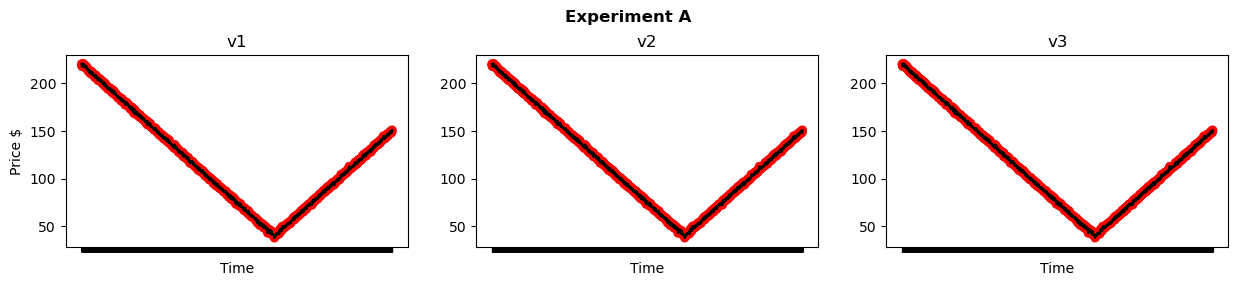

In [6]:
plot_points("IBM", "ExperimentA", "IBM\\ExperimentA\\actions.png", "A")

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


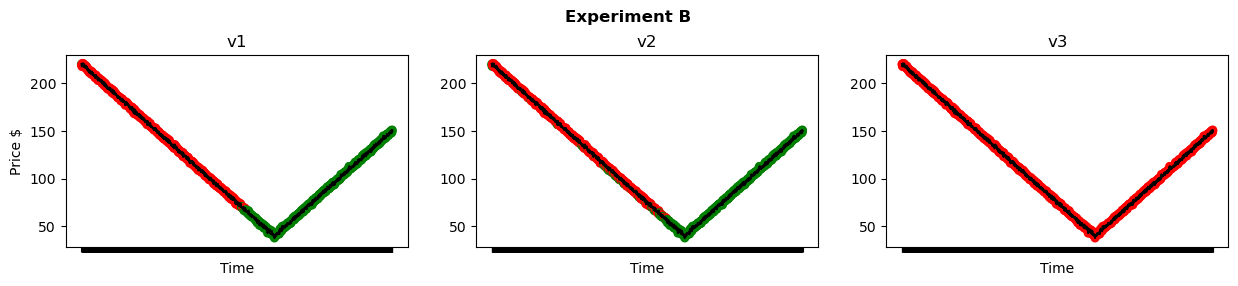

In [8]:
plot_points("IBM", "ExperimentB", "IBM\\ExperimentB\\actions.png", "B")

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


ValueError: 'c' argument has 1452 elements, which is inconsistent with 'x' and 'y' with size 1442.

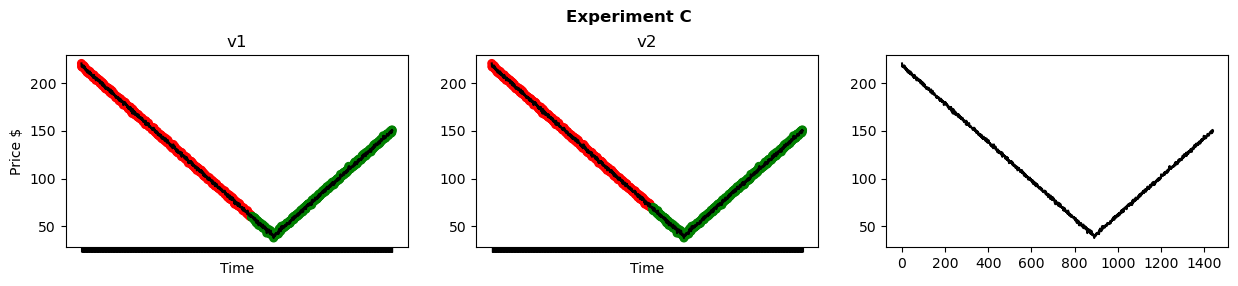

In [9]:
plot_points("IBM", "ExperimentC", "IBM\\ExperimentC\\actions.png", "C")

C:\Users\aineg\AppData\Local\Temp\ipykernel_27160\2736619613.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i].scatter(np.arange(len(close_ts)), close_ts, c=actions[i], cmap='cool', s=30)


ValueError: 'c' argument has 1452 elements, which is inconsistent with 'x' and 'y' with size 1442.

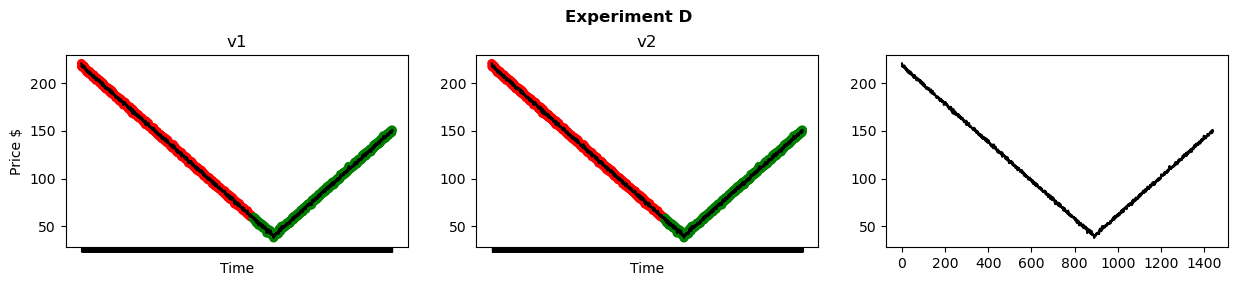

In [11]:
plot_points("IBM", "ExperimentD", "IBM\\ExperimentD\\actions.png", "D")

In [168]:
import yfinance as yf

In [366]:
IBM_train = pd.read_csv("IBM\\train.csv")
IBM_test = pd.read_csv("IBM\\test.csv")

IBM_train_close = IBM_train["close"]
IBM_train_close.index=pd.to_datetime(IBM_train["date"]).values
IBM_test_close = IBM_test["close"]
IBM_test_close.index=pd.to_datetime(IBM_test["date"])

TWTR_train = pd.read_csv("TWTR\\train.csv")
TWTR_test = pd.read_csv("TWTR\\test.csv")

TWTR_train_close = TWTR_train["close"]
TWTR_train_close.index=pd.to_datetime(TWTR_train["date"]).values
TWTR_test_close = TWTR_test["close"]
TWTR_test_close.index=pd.to_datetime(TWTR_test["date"]).values


M_train = pd.read_csv("M\\train.csv")
M_test = pd.read_csv("M\\test.csv")

M_train_close = M_train["close"]
M_train_close.index=pd.to_datetime(M_train["date"]).values
M_test_close = M_test["close"]
M_test_close.index=pd.to_datetime(M_test["date"]).values

In [174]:
IBM_train_start = IBM_train["date"][0]
IBM_train_end = IBM_train["date"][len(IBM_train)-1]
IBM_test_start = IBM_test["date"][0]
IBM_test_end = IBM_test["date"][len(IBM_test)-1]

TWTR_train_start = TWTR_train["date"][0]
TWTR_train_end = TWTR_train["date"][len(TWTR_train)-1]
TWTR_test_start = TWTR_test["date"][0]
TWTR_test_end = TWTR_test["date"][len(TWTR_test)-1]

KO_train_start = KO_train["date"][0]
KO_train_end = KO_train["date"][len(KO_train)-1]
KO_test_start = KO_test["date"][0]
KO_test_end = KO_test["date"][len(KO_test)-1]

In [597]:
def plot_train_test(train, test, ticker, corp_name):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6),
                          gridspec_kw={'hspace': 0.5})

    ax[0].plot(train, 'blue', test, 'orange')
    main = corp_name + " Stock Closing Price"
    ax[0].set_title(main)
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Stock Price $")
    ax[0].legend(["Train","Test"])
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Price $')



    ax[1].plot(test, 'orange')
    main = corp_name + " Stock Closing Price Test Data"
    ax[1].set_title(main)
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("Stock Price $")
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Price $')

    saveloc = ticker + "\\data.png"
#     plt.savefig(saveloc)
    plt.show()

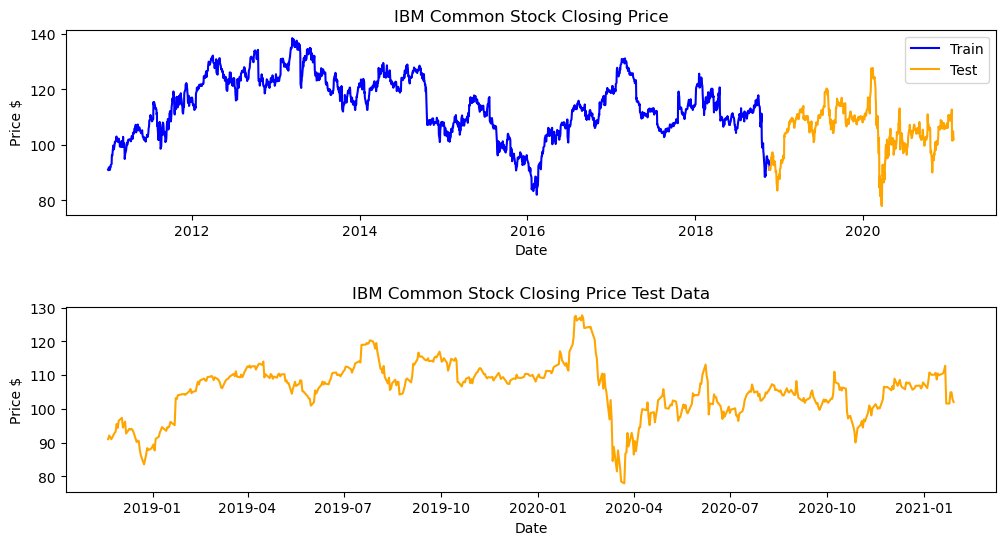

In [599]:
plot_train_test(IBM_train_close, IBM_test_close, "IBM", "IBM Common")

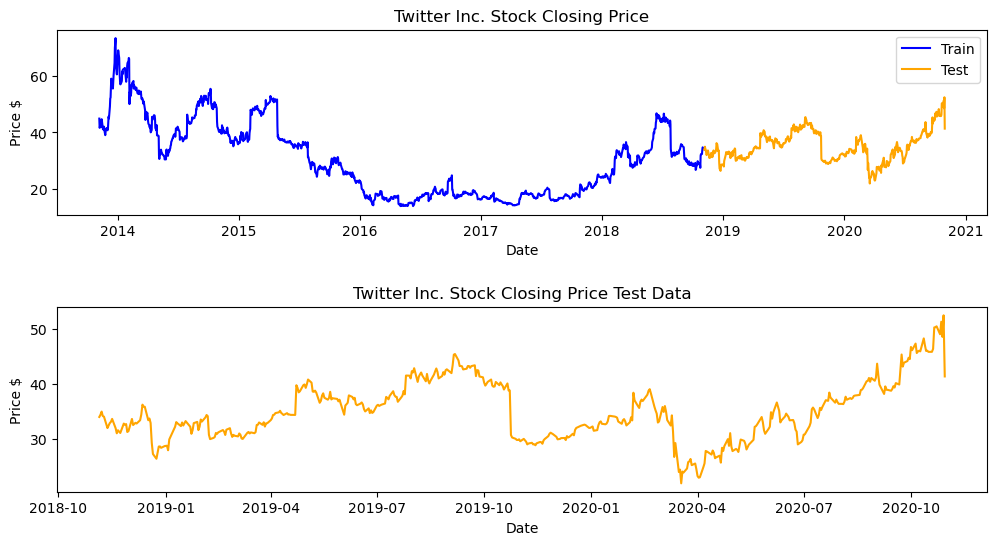

In [600]:
plot_train_test(TWTR_train_close, TWTR_test_close, "TWTR", "Twitter Inc.")

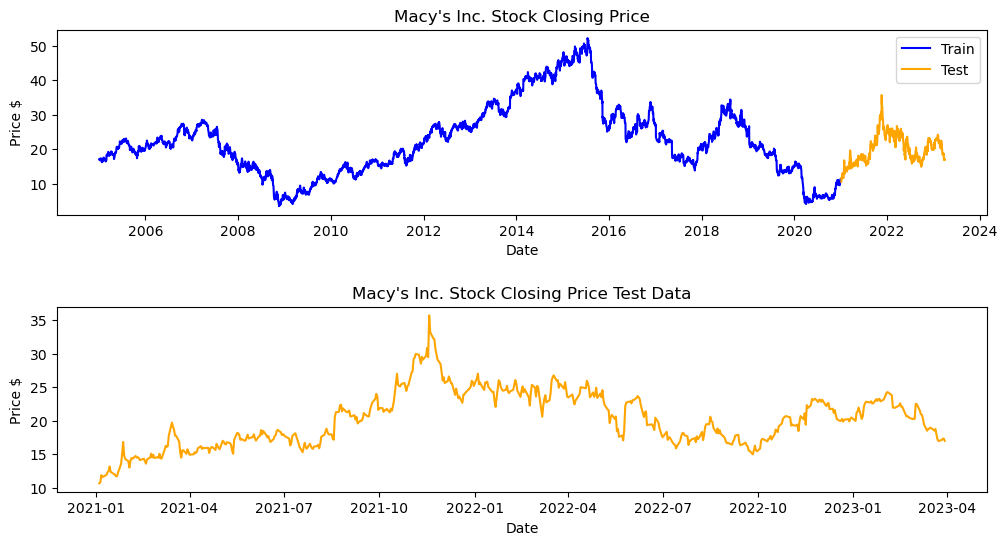

In [601]:
plot_train_test(M_train_close, M_test_close, "M", "Macy's Inc.")